In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Exploratory data analysis with Seaborn and Pandas

### Seaborn

- Seaborn is a library for making attractive and informative statistical graphics in Python.
- Built on top of matplotlib.

In [2]:
import seaborn as sns

In [3]:
housing = pd.read_csv('house_train.csv')

In [4]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### The questions that will guide our analysis

1. Understand the individual variables in the dataset
2. Understand how the variables in the dataset with the SalesPrice of the house

### Mixed data

- Numerical variables

- Categorical variables

In [6]:
# Getting the numerical columns
# numeric_cols = subset_of_interest.select_dtypes(include=[np.number]).columns

In [7]:
numerical_vars = ['SalePrice','LotArea', 'OverallQual', 'OverallCond', 
                  'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr']
categorical_vars = ['MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold']

In [8]:
final_data = housing[numerical_vars+categorical_vars]

In [9]:
final_data.head()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr,MSZoning,LotShape,Neighborhood,CentralAir,SaleCondition,MoSold,YrSold
0,208500,8450,7,5,2003,856,854,3,RL,Reg,CollgCr,Y,Normal,2,2008
1,181500,9600,6,8,1976,1262,0,3,RL,Reg,Veenker,Y,Normal,5,2007
2,223500,11250,7,5,2001,920,866,3,RL,IR1,CollgCr,Y,Normal,9,2008
3,140000,9550,7,5,1915,961,756,3,RL,IR1,Crawfor,Y,Abnorml,2,2006
4,250000,14260,8,5,2000,1145,1053,4,RL,IR1,NoRidge,Y,Normal,12,2008


## Understand individual variables

### Key variable (SalePrice)

In [10]:
final_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [23]:
final_data.describe() # 숫자형 데이터만 나옴 

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438,6.321918,2007.815753
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778,2.703626,1.328095
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000,1.000000,2006.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000,5.000000,2007.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000,6.000000,2008.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000,8.000000,2009.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000,12.000000,2010.000000


### edgecolor='black' 안 했을 때

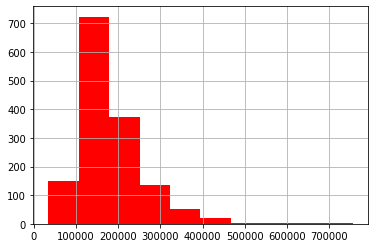

In [24]:
final_data['SalePrice'].hist(color='red',bins=10)
plt.show()

In [25]:
%matplotlib inline

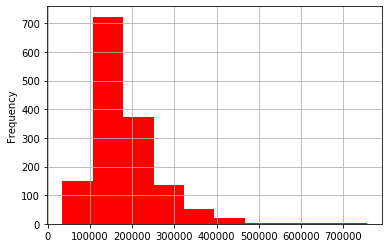

In [26]:
final_data['SalePrice'].plot(kind='hist',grid=True,color='red',bins=10)

### edgecolor='black' 했을 때

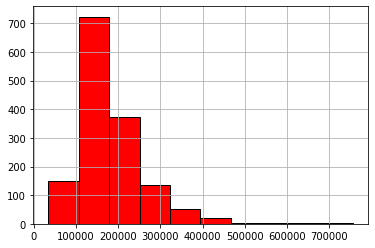

In [27]:
final_data['SalePrice'].hist(color='red',edgecolor='black',bins=10)
plt.show()

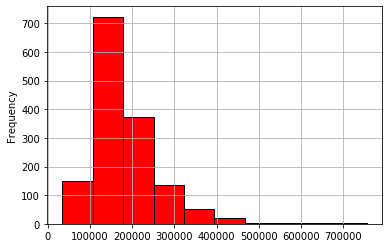

In [20]:
final_data['SalePrice'].plot(kind='hist',color='red',grid=True, bins=10,edgecolor='black')

### 표본 비대칭도 

https://sacko.tistory.com/18

In [28]:
final_data['SalePrice'].skew() # 표본 비대칭도 = 왜도(歪度)
# 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 평균과 중앙값이 같으면 왜도는 0이 된다.

1.8828757597682129

### 표본 첨도 

In [29]:
final_data['SalePrice'].kurt() # 표본 첨도 : 0이면 정규분포 0보다 크면 더 뾰족 0보다 작으면 더 펑퍼짐

6.536281860064529

### Numerical variables

In [30]:
final_data[numerical_vars].describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000


- LotAre: Lot size
- OverallQual: rate the overall material and finish
- OverallCond: rate the overall condition
- 1stFlrSF: 1층 넓이
- 2ndFlrSF: 2층 넓이
- YearBuilt: 건축년도
- BedroomAbvGr: 방수

### 히스토그램: figsize=(14,5): x축 길이=14, y축 길이=5, layout=(2,4): 2행 4열

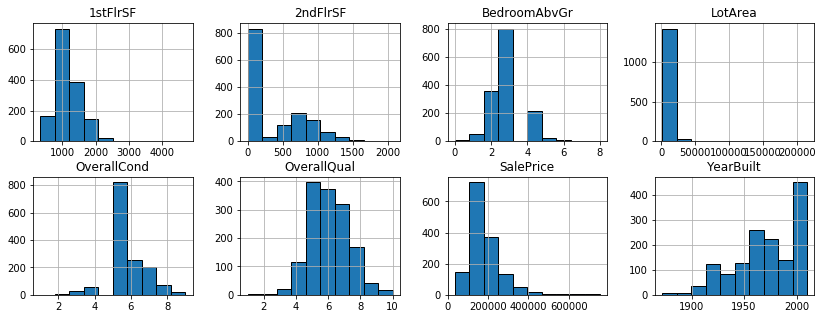

In [32]:
final_data[numerical_vars].hist(edgecolor='black',figsize=(14,5),layout=(2,4));
plt.show()

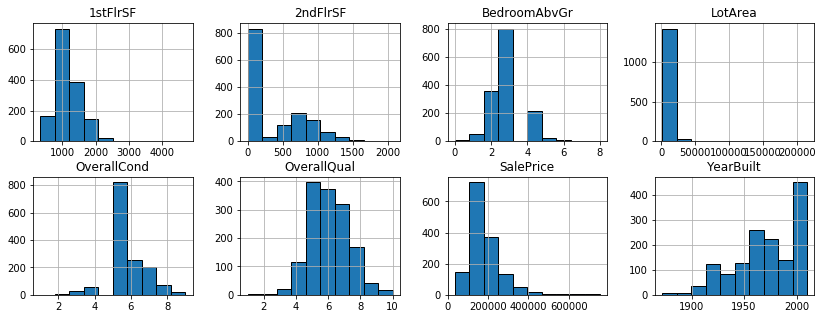

In [34]:
final_data[numerical_vars].hist(grid=True,edgecolor='black',figsize=(14,5),layout=(2,4))
plt.show()

### matplotlib.pyplot 에서 그래프 여러개를 그리는 방법 
#### subplot 사용
    plt.subplot(2,2,1)
    plt.plot(x,y1)

    plt.subplot(2,2,2)
    plt.plot(x,y2)

    plt.subplot(2,2,3)
    plt.plot(x,y3)

    plt.subplot(2,2,4)
    plt.plot(x,y4)

### pandas에서 그래프 여러개 그리는 방법
#### layout 사용
    final_data[numerical_vars].hist(edgecolor='black',figsize=(14,5),layout=(2,4));
    plt.show()
    

In [36]:
final_data['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Categorical variables

In [37]:
housing['SaleCondition'].value_counts(normalize=True) # normalize=True: 각 value의 percentage

Normal     0.820548
Partial    0.085616
Abnorml    0.069178
Family     0.013699
Alloca     0.008219
AdjLand    0.002740
Name: SaleCondition, dtype: float64

### 바 차트

범주형 변수

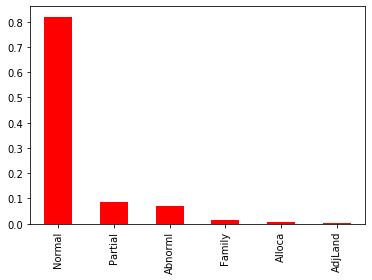

In [64]:
housing['SaleCondition'].value_counts(normalize=True).plot(kind='bar',color='r')
plt.show()

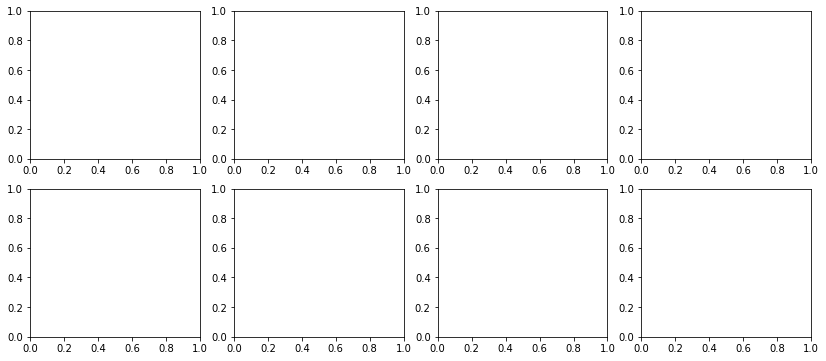

In [65]:
fig, ax = plt.subplots(2,4,figsize=(14,6))

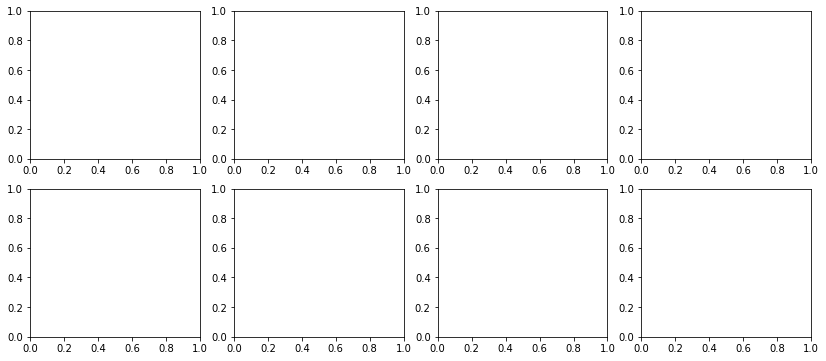

In [66]:
fig # in each figure has a each axis 

### x축, y축: axis / 네모 안: axes 

In [67]:
ax 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E4F3B54C8>,
      dtype=object)

In [68]:
categorical_vars

['MSZoning',
 'LotShape',
 'Neighborhood',
 'CentralAir',
 'SaleCondition',
 'MoSold',
 'YrSold']

In [69]:
ax.flatten() # 2차원 배열을 1차원 배열로 만들어줌 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E4F3B54C8>,
      dtype=object)

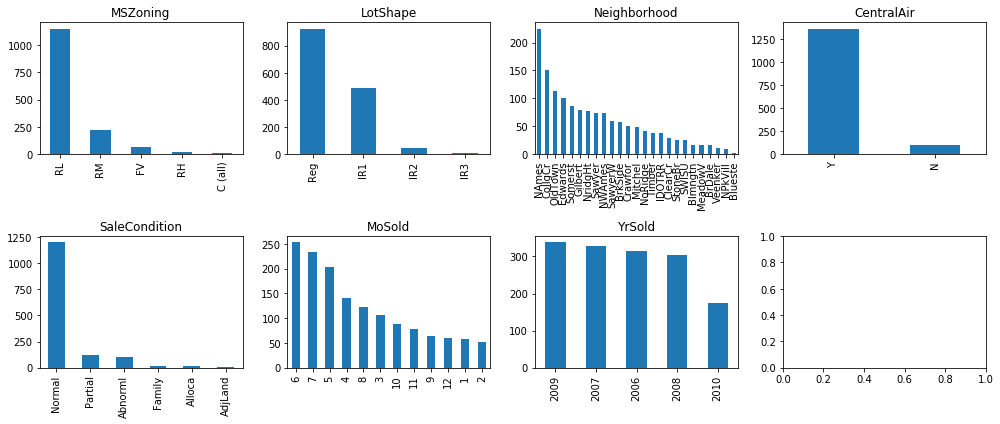

In [80]:
# var: categorical_vars, subplot: ax.flatten()
# ax[0]:MSZoning, ax[1]:LotShape...
# ax.flatten(): 2 by 4 -> 1 by 8
fig, ax = plt.subplots(2,4,figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    final_data[var].value_counts().plot(kind='bar',ax=subplot, title=var)
fig.tight_layout()
plt.show()

Numerical variable에 대해서도 위와 같은 for 문을 이용해서 각 변수에 대한 histogram을 그려라

In [73]:
numerical_vars

['SalePrice',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 '1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr']

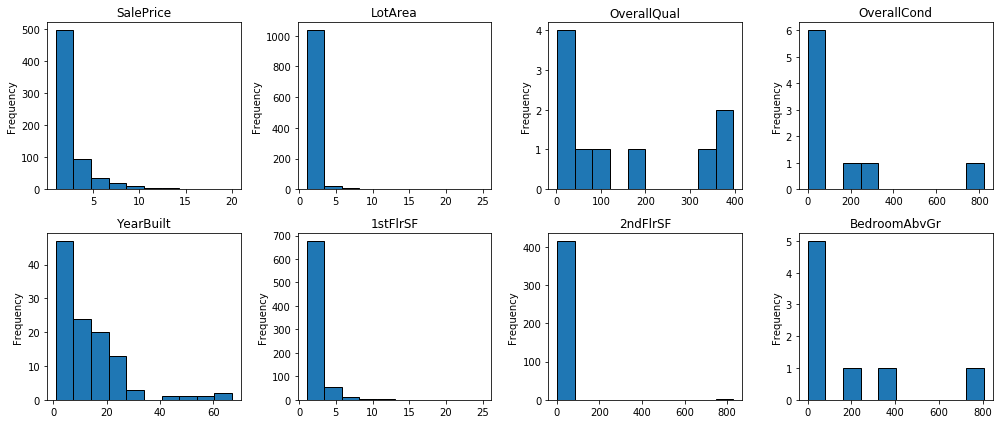

In [74]:
fig, ax = plt.subplots(2,4,figsize=(14,6))
for var, subplot in zip(numerical_vars, ax.flatten()):
    final_data[var].value_counts().plot(kind='hist',ax=subplot, title=var, edgecolor='black')
fig.tight_layout()
plt.show()

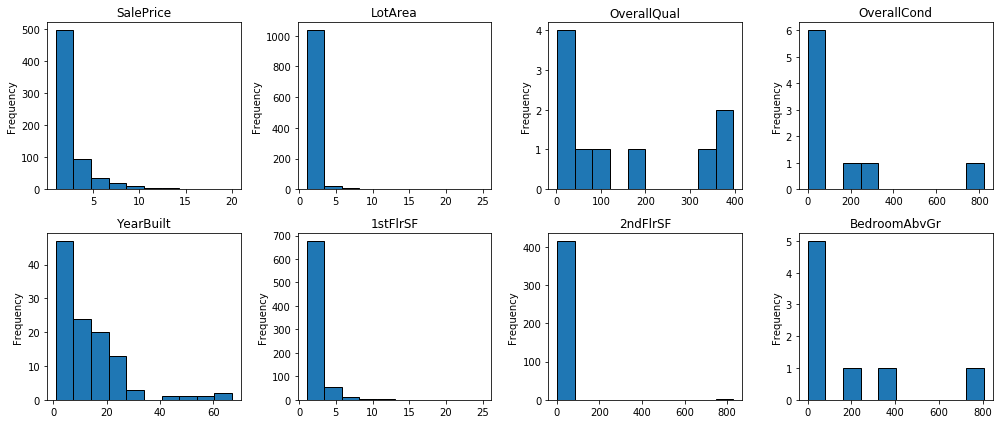

In [75]:
fig, ax = plt.subplots(2,4,figsize=(14,6))
for var, subplot in zip(numerical_vars, ax.flatten()):
    final_data[var].value_counts().plot(kind='hist',ax=subplot,title=var,edgecolor='black')
fig.tight_layout()
plt.show()

## Relationships between numerical variables

The seaborn library excels when we want to investigate relationship between variables, with very few lines of code we can get very informative plots and discover patterns and relationships between our variables.

숫자 변수 간의 관계

seaborn library는 우리가 변수들 사이의 관계를 조사하고자 할 때 탁월하며, 몇 안되는 코드로 우리는 매우 유익한 플롯을 얻을 수 있고, 우리의 변수들 사이의 패턴과 관계를 발견할 수 있다.

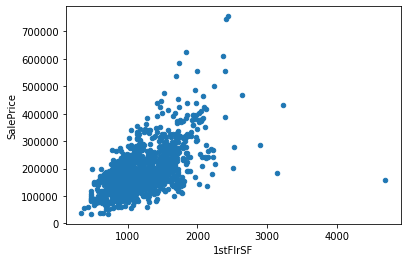

In [81]:
housing.plot(kind='scatter',x='1stFlrSF', y='SalePrice')
plt.show()

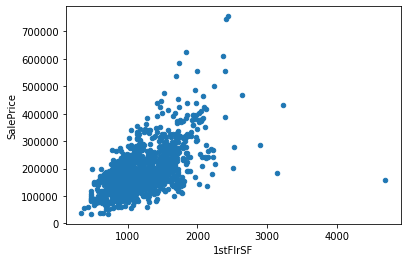

In [82]:
housing.plot(kind='scatter',x='1stFlrSF', y='SalePrice')

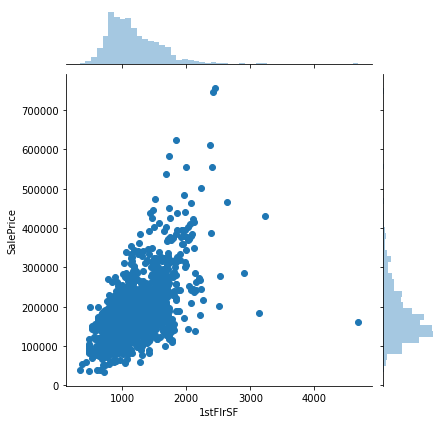

In [35]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=final_data);
plt.show()

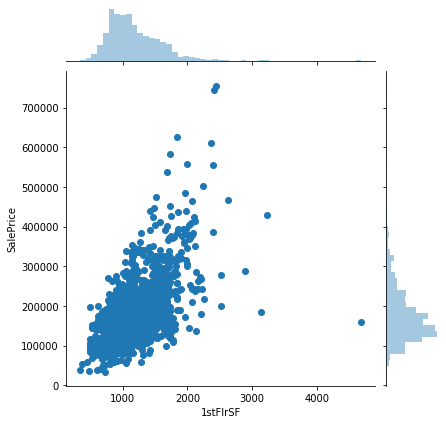

In [83]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=final_data)

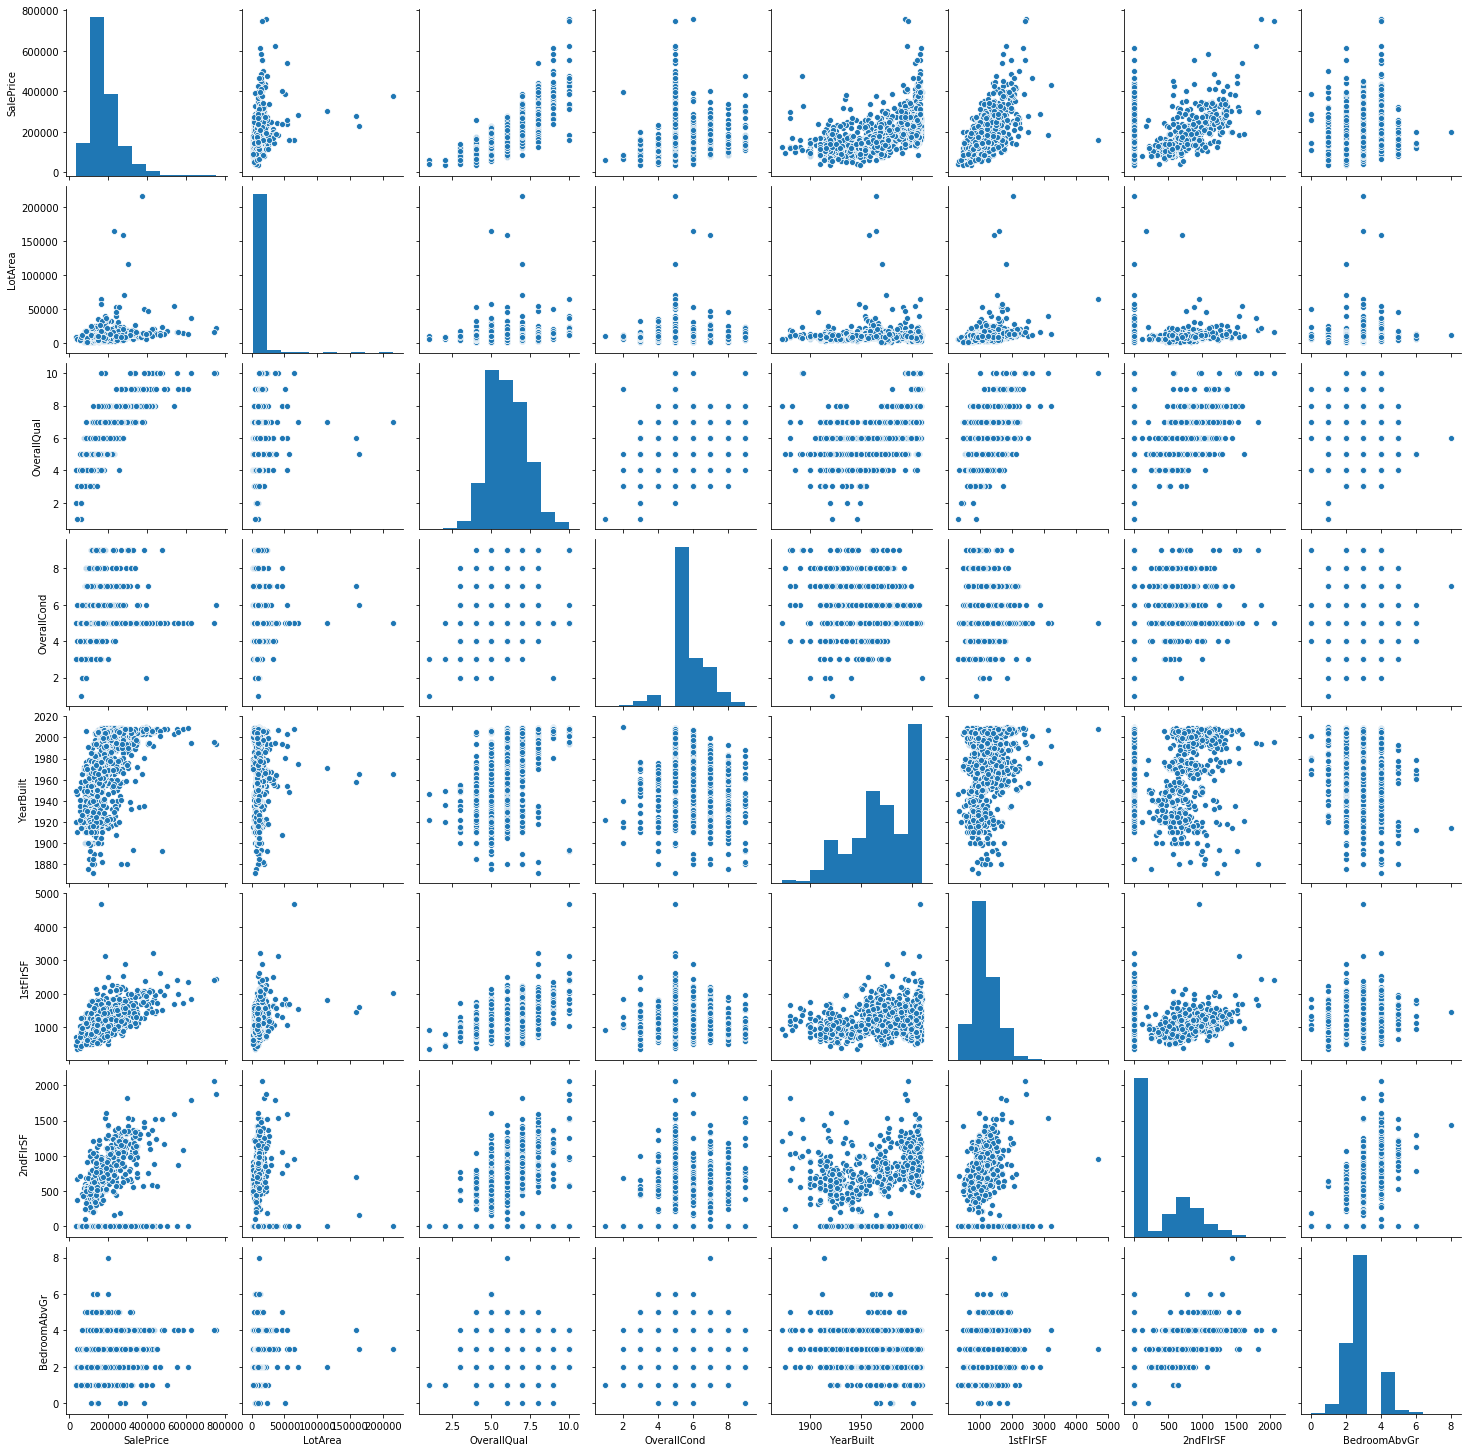

In [84]:
sns.pairplot(final_data[numerical_vars])
plt.show()
# pairplot은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다. 
# 같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

In [85]:
housing[numerical_vars].corr()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
SalePrice,1.000000,0.263843,0.790982,-0.077856,0.522897,0.605852,0.319334,0.168213
LotArea,0.263843,1.000000,0.105806,-0.005636,0.014228,0.299475,0.050986,0.119690
OverallQual,0.790982,0.105806,1.000000,-0.091932,0.572323,0.476224,0.295493,0.101676
OverallCond,-0.077856,-0.005636,-0.091932,1.000000,-0.375983,-0.144203,0.028942,0.012980
YearBuilt,0.522897,0.014228,0.572323,-0.375983,1.000000,0.281986,0.010308,-0.070651
1stFlrSF,0.605852,0.299475,0.476224,-0.144203,0.281986,1.000000,-0.202646,0.127401
2ndFlrSF,0.319334,0.050986,0.295493,0.028942,0.010308,-0.202646,1.000000,0.502901
BedroomAbvGr,0.168213,0.119690,0.101676,0.012980,-0.070651,0.127401,0.502901,1.000000


In [42]:
housing[numerical_vars].corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
1stFlrSF        0.605852
YearBuilt       0.522897
2ndFlrSF        0.319334
LotArea         0.263843
BedroomAbvGr    0.168213
OverallCond    -0.077856
Name: SalePrice, dtype: float64

In [87]:
housing[numerical_vars].corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
1stFlrSF        0.605852
YearBuilt       0.522897
2ndFlrSF        0.319334
LotArea         0.263843
BedroomAbvGr    0.168213
OverallCond    -0.077856
Name: SalePrice, dtype: float64

### sort_value 가 아니라 sort_values !!

## heatmap

In [88]:
correlations = housing[numerical_vars].corr()

In [89]:
correlations

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
SalePrice,1.000000,0.263843,0.790982,-0.077856,0.522897,0.605852,0.319334,0.168213
LotArea,0.263843,1.000000,0.105806,-0.005636,0.014228,0.299475,0.050986,0.119690
OverallQual,0.790982,0.105806,1.000000,-0.091932,0.572323,0.476224,0.295493,0.101676
OverallCond,-0.077856,-0.005636,-0.091932,1.000000,-0.375983,-0.144203,0.028942,0.012980
YearBuilt,0.522897,0.014228,0.572323,-0.375983,1.000000,0.281986,0.010308,-0.070651
1stFlrSF,0.605852,0.299475,0.476224,-0.144203,0.281986,1.000000,-0.202646,0.127401
2ndFlrSF,0.319334,0.050986,0.295493,0.028942,0.010308,-0.202646,1.000000,0.502901
BedroomAbvGr,0.168213,0.119690,0.101676,0.012980,-0.070651,0.127401,0.502901,1.000000


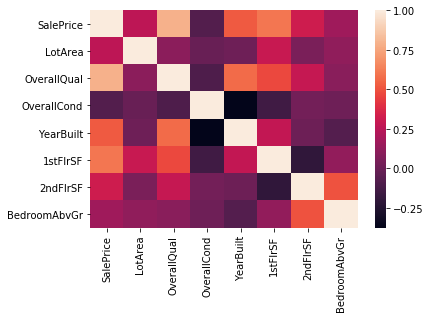

In [50]:
sns.heatmap(correlations)
plt.show()

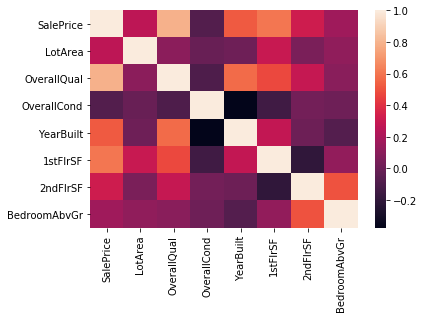

In [90]:
sns.heatmap(correlations)

## Relationship of SalePrice with categorical variables

Here we are interested in the relashionship between the categorical variables in our dataset and the SalePrice of the house. The standard plot to examine the relashionship between a numerical and a categorical variable is the boxplot. A boxplot is a convenient way of graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution. 

### 범주형 변수와 SalePrice의 관계

    여기서 우리는 우리의 데이터 집합에 있는 범주형 변수와 그 집의 SalePrice 사이의 관계에 관심이 있다. 숫자와 범주형 변수 사이의 재분석을 조사하는 표준 그림은 상자 그림이다. 상자 그림은 숫자 데이터 그룹을 사분위수를 통해 그래픽으로 묘사하는 편리한 방법이다. 상자 그림은 상자(수염)에서 수직으로 확장되어 상단과 하단 사분위수 외부의 가변성을 나타내는 선이 있을 수 있으므로 상자 그림 및 상자 그림이라는 용어가 있다. 특이치는 개별 점으로 표시할 수 있다. 상자 그림은 비모수적이다. 상자 그림은 기초적인 통계 분포를 가정하지 않고 통계 모집단의 표본에 변동을 나타낸다.

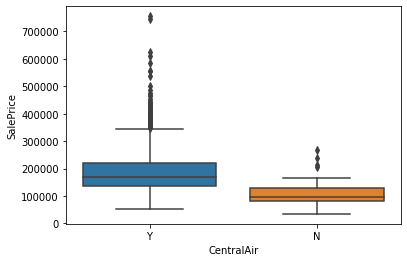

In [91]:
sns.boxplot(x='CentralAir', y='SalePrice', data=final_data)
plt.show()

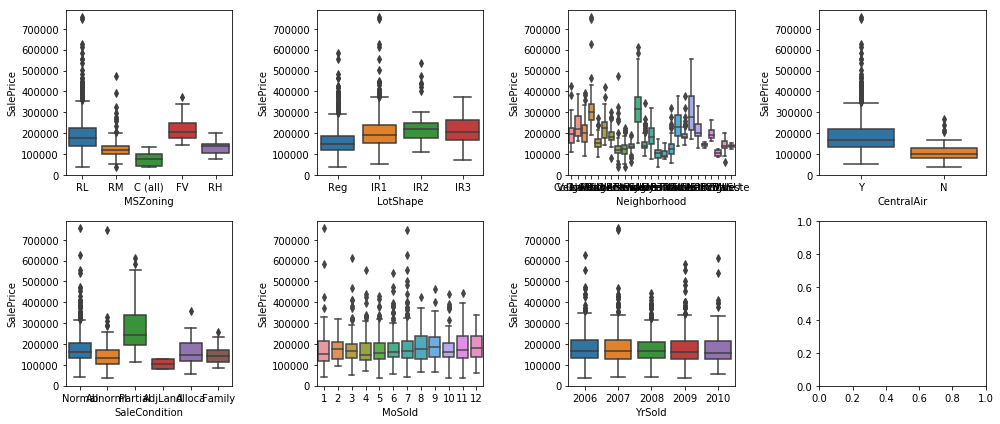

In [54]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=final_data, ax=subplot)
fig.tight_layout()
plt.show()

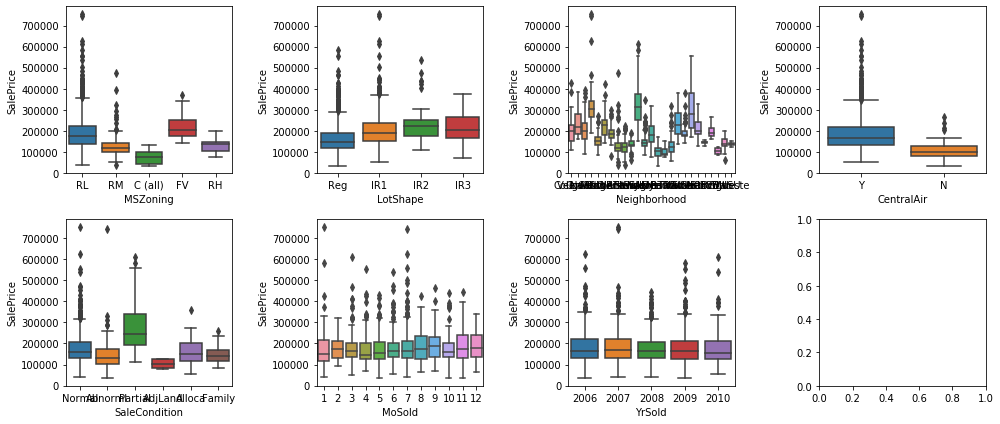

In [93]:
fig, ax = plt.subplots(2,4,figsize=(14,6))
for var, subplot in zip(categorical_vars,ax.flatten()):
    sns.boxplot(x=var,y='SalePrice',data=final_data,ax=subplot)
fig.tight_layout()
plt.show()